In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
data=pd.read_csv('TSLA.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data=data.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:

data=data.rename(columns={'Date':'ds'})
data=data.rename(columns={'Close':'y'})
data

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007


In [6]:
m = Prophet(
    growth="linear",
    #holidays=holidays,
    #seasonality_mode="multiplicative",
    changepoint_prior_scale=30,
    seasonality_prior_scale=35,
    ###cap=3.00,
    ###floor=.65*125,
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    ).add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=55
    ).add_seasonality(
        name='daily',
        period=1,
        fourier_order=15
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20
    ).add_seasonality(
        name='quarterly',
        period=365.25/4,
        fourier_order=5,
        prior_scale=15)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
predper = 60 #number of days to predict ahead

In [8]:
future = m.make_future_dataframe(periods=predper)
future.tail()

,ds
2471,2020-03-30
2472,2020-03-31
2473,2020-04-01
2474,2020-04-02
2475,2020-04-03


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2471,2020-03-30,294.951158,248.355161,339.369143
2472,2020-03-31,299.273740,254.790014,346.573471
2473,2020-04-01,301.692329,254.052181,342.352886
2474,2020-04-02,292.396766,247.062085,334.511397
2475,2020-04-03,289.928431,240.509553,336.983664


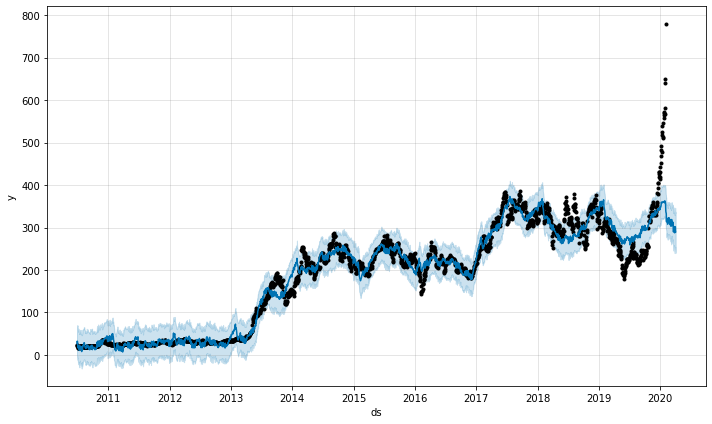

In [10]:
fig1 = m.plot(forecast)

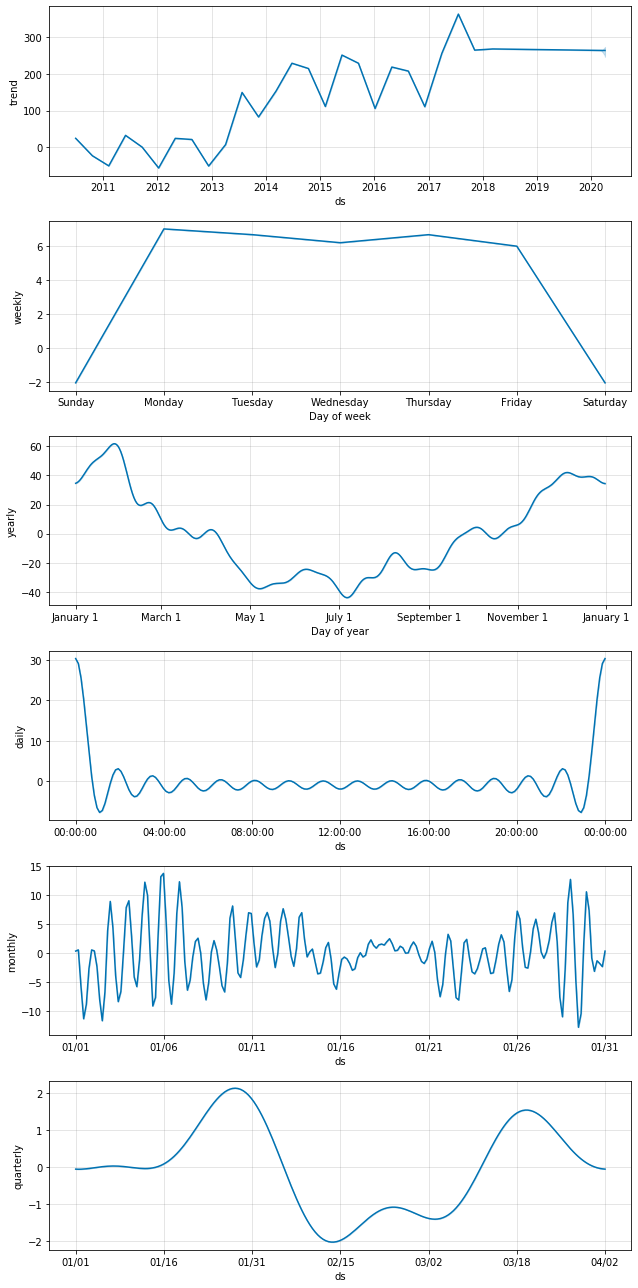

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
from fbprophet.diagnostics import cross_validation

In [ ]:
#from fbprophet.diagnostics import cross_validation
#df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
#df_cv.head()

In [13]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 14 forecasts with cutoffs between 2012-09-07 00:00:00 and 2019-02-03 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-09-10,29.239711,28.033767,30.489359,27.370001,2012-09-07
1,2012-09-11,30.421025,29.191320,31.611047,27.799999,2012-09-07
2,2012-09-12,30.019537,28.799614,31.219052,28.280001,2012-09-07
3,2012-09-13,29.300761,27.994867,30.451061,29.480000,2012-09-07
4,2012-09-14,29.684107,28.308329,30.954899,30.389999,2012-09-07


In [14]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,1030.189090,32.096559,23.938840,0.105031,0.090786,0.259091
1,38 days,1058.311764,32.531704,24.326972,0.106535,0.092793,0.254261
2,39 days,1089.962527,33.014581,24.726449,0.107960,0.094419,0.254545
3,40 days,1117.725219,33.432398,24.964705,0.109427,0.094419,0.261995
4,41 days,1169.052467,34.191409,25.537670,0.112119,0.097880,0.265341
